In [220]:
"""
    (Successful) Attempt for the controlled version:
"""
import numpy as np
import qiskit
from qiskit.quantum_info import state_fidelity
from numpy import linalg as LA
import qib
import matplotlib.pyplot as plt
import scipy
import h5py

import sys
sys.path.append("../../src/brickwall_sparse")
from utils_sparse import construct_ising_local_term, reduce_list, X, I2, get_perms
from ansatz_sparse import ansatz_sparse
import rqcopt as oc
from scipy.sparse.linalg import expm_multiply
from qiskit.quantum_info import random_statevector
from optimize_sparse import optimize

Vlists_2, Vlists_3, Vlists_4, Vlists_5, Vlists_6, Vlists_9 = ([], [], [], [], [], [])
errs_2, errs_3, errs_4, errs_5, errs_6, errs_9 = ([], [], [], [], [], [])
t_errs2, t_errs3, t_errs6, t_errs9 = ([], [], [], [])
L = 6
ts = list(np.logspace(-10, 1, num=40))

for t in ts:
    latt = qib.lattice.IntegerLattice((L, ), pbc=True)
    field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
    J, h, g = (1, 0, 3)
    hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()
    
    X = np.array([[0, 1], [1, 0]])
    Z = np.array([[1, 0], [0, -1]])
    Y = np.array([[0, -1j], [1j, 0]])
    I2 = np.array([[1, 0], [0, 1]])
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_2 = [V1, V2]
    perms_2 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_2))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
    perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_5 = [V1, V2, V2, V2, V1]
    perms_5 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_5))]
    
    hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
    V1 = scipy.linalg.expm(-1j*t*hloc/2)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_4 = [V1, V2]*2
    perms_4 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_4))]
    
    V1 = scipy.linalg.expm(-1j*t*hloc/4)
    V2 = scipy.linalg.expm(-1j*t*hloc/2)
    Vlist_reduced_6 = [V1, V2, V1]*2
    perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    

    state = random_statevector(2**L).data
    t_errs3.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_3, L, perms_3, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    niter = 30
    rS    = 5
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_2, perms_2, rS=rS, niter=niter)
    errs_2.append(err_iter[-1])
    Vlists_2.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=niter)
    errs_3.append(err_iter[-1])
    Vlists_3.append(Vlist)
    
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_5, perms_5, rS=rS, niter=niter)
    errs_5.append(err_iter[-1])
    Vlists_5.append(Vlist)
    
    """t_errs6.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_6, L, perms_6, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=niter)
    errs_6.append(err_iter[-1])
    Vlists_6.append(Vlist)"""
    
    """t_errs9.append(np.linalg.norm(ansatz_sparse(Vlist_reduced_9, L, perms_9, state) - expm_multiply(
        -1j * t * hamil, state), ord=2))
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9.append(err_iter[-1])
    Vlists_9.append(Vlist)"""

Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  2.221258715645569e-16
Current error:  5.974749086826701e-16
Current erro

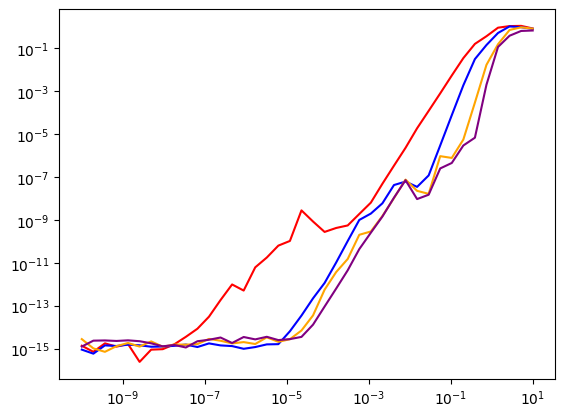

In [482]:
plt.plot(ts, errs_2, color='red')
#plt.plot(ts, t_errsL6_3, color='blue', ls='--')
plt.plot(ts, errs_3, color='blue')
plt.plot(ts, errs_5, color='orange')
#plt.plot(ts, errs_2, color='red')
plt.plot(ts, errs_6, color='purple')
#plt.plot(ts, errs_9, color='pink')



plt.yscale('log')
plt.xscale('log')
#plt.xlim([1e-6, 1.5])

In [584]:
import numpy as np

def random_unitary(n=4):
    """
    Generate a random n x n unitary matrix using QR decomposition.
    Default is 4x4.
    """
    # Random complex Gaussian matrix
    Z = (np.random.randn(n, n) + 1j * np.random.randn(n, n)) / np.sqrt(2)
    
    # QR decomposition
    Q, R = np.linalg.qr(Z)
    
    # Normalize phases to ensure unitarity
    D = np.diag(R)
    L = np.diag(D / np.abs(D))
    
    return Q @ L

In [ ]:
L = 4
rs = 10

latt = qib.lattice.IntegerLattice((L, ), pbc=True)
field = qib.field.Field(qib.field.ParticleType.QUBIT, latt)
J, h, g = (1, 0, 3)
hamil = qib.IsingHamiltonian(field, J, h, g).as_matrix()

    
hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
V2 = scipy.linalg.expm(-1j*t*hloc)
Vlist_reduced_2 = [V2, V2]
perms_2 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_2))]
    
hloc = construct_ising_local_term(J, 0, 0, ndim=2) + g*(np.kron(X, I2)+np.kron(I2, X))/2
V1 = scipy.linalg.expm(-1j*t*hloc/2)
V2 = scipy.linalg.expm(-1j*t*hloc)
    Vlist_reduced_3 = [V1, V2, V1]
perms_3 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_3))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/4)
V2 = scipy.linalg.expm(-1j*t*hloc/2)
Vlist_reduced_6 = [V1, V2, V1]*2
perms_6 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_6))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/6)
V2 = scipy.linalg.expm(-1j*t*hloc/3)
Vlist_reduced_9 = [V1, V2, V1]*3
perms_9 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_9))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/8)
V2 = scipy.linalg.expm(-1j*t*hloc/4)
Vlist_reduced_12 = [V1, V2, V1]*4
perms_12 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_12))]
    
V1 = scipy.linalg.expm(-1j*t*hloc/10)
V2 = scipy.linalg.expm(-1j*t*hloc/5)
Vlist_reduced_15 = [V1, V2, V1]*5
perms_15 = [[[i for i in range(L)]] if i%2==0 else [[i for i in range(1, L)]+[0]] for i in range(len(Vlist_reduced_15))]

In [957]:
errs_2_L6 = []
errs_3_L6 = []
for t in [100]:
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_2, perms_2, rS=rS, niter=20)
    errs_2_L6.append(err_iter[-1])
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_3, perms_3, rS=rS, niter=50)
    errs_3_L6.append(err_iter[-1])

Current error:  0.7423657890768046
Current error:  0.7388075546935855
Current error:  0.7319058614337485
Current error:  0.7189731654174464
Current error:  0.696622988959109
Current error:  0.6748286791247085
Current error:  0.6585903147431709
Current error:  0.6465178959929025
Current error:  0.6378608291220156
Current error:  0.6324955214164681
Current error:  0.6303059592877329
Current error:  0.6302869832102534
Current error:  0.6302919471739796
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.6302896525413179
Current error:  0.772545593697036
Current error:  0.7678168969711131
Current error:  0.7585199162056551
Current error:  0.7405993726925673
Current error:  0.7076913423177056
Current error:  0.6725601798959736
Current error:  0.6444633239464526
Current error:  0.6232

In [963]:
errs_6_L6 = [1.865414376582774e-09]
for t in [100]:
    Vlist6, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_6, perms_6, rS=rS, niter=200)
    errs_6_L6.append(err_iter[-1])

Current error:  0.6520710707747777
Current error:  0.6470465550245288
Current error:  0.6373834765727308
Current error:  0.6196430488712367
Current error:  0.590648988831137
Current error:  0.5648310696171144
Current error:  0.5438602795610188
Current error:  0.5229386471206479
Current error:  0.5080213953026772
Current error:  0.4837884336092316
Current error:  0.468073901913422
Current error:  0.446038703837213
Current error:  0.4314413018354647
Current error:  0.41531729666894635
Current error:  0.4046627769788488
Current error:  0.39588197326090296
Current error:  0.39103717910780744
Current error:  0.3826408056153701
Current error:  0.3783232342139701
Current error:  0.3699808914496342
Current error:  0.3645097316137765
Current error:  0.35614422848869004
Current error:  0.3494721559272441
Current error:  0.3411470307785799
Current error:  0.3343011181526895
Current error:  0.3260610163123211
Current error:  0.31946458371739384
Current error:  0.31141629209115923
Current error:  0

In [964]:
errs_9_L6 = []    
for t in [100]:
    Vlist9, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_9, perms_9, rS=rS, niter=niter)
    errs_9_L6.append(err_iter[-1])

Current error:  1.0375127274753315
Current error:  1.0298132712424661
Current error:  1.0144417602278257
Current error:  0.9838447537253467
Current error:  0.9235279348697908
Current error:  0.8504801523299829
Current error:  0.7812952450349804
Current error:  0.7172025708535344
Current error:  0.6587897306743816
Current error:  0.6058100870001965
Current error:  0.55724489806491
Current error:  0.5117802433301254
Current error:  0.4683681912356182
Current error:  0.4265942634446411
Current error:  0.3866656485905814
Current error:  0.355647895638673
Current error:  0.31781858049794387
Current error:  0.29018462570892645
Current error:  0.26233617614666255
Current error:  0.24174476129143868
Current error:  0.22164277130202353
Current error:  0.20731437599139696
Current error:  0.1882641797769634
Current error:  0.17347802791286396
Current error:  0.15811653089974947
Current error:  0.1462197211745217
Current error:  0.13691835578265563
Current error:  0.1304186959828733
Current error:

In [ ]:
errs_12_L6 = []    
for t in [100]:
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_12, perms_12, rS=rS, niter=niter)
    errs_12_L6.append(err_iter[-1])

In [ ]:
errs_15_L6 = []    
for t in [100]:
    Vlist, f_iter, err_iter = optimize(L, hamil, t, Vlist_reduced_15, perms_15, rS=rS, niter=niter)
    errs_15_L6.append(err_iter[-1])

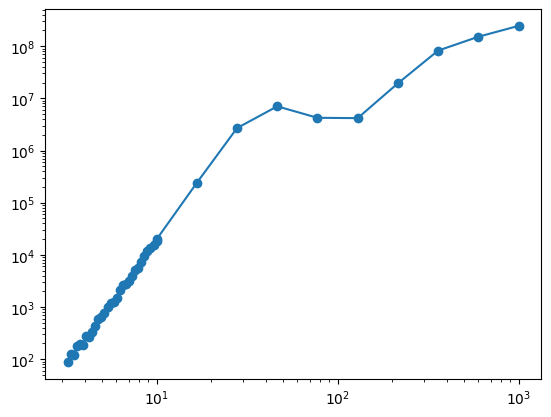

In [868]:
ts = list(np.logspace(-3, -1, num=10))+list(np.logspace(-1, 0, num=60)[:30])
plt.plot([1/t for t in ts], [1/eps for eps in errs_3])
plt.scatter([1/t for t in ts], [1/eps for eps in errs_3])


plt.xscale('log')
plt.yscale('log')

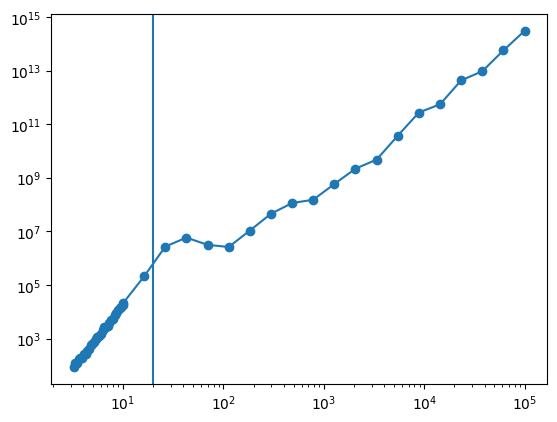

In [893]:
ts = list(np.logspace(-5, -1, num=20)) + ts_long
plt.plot([1/t for t in ts], [1/eps for eps in errs_3_L6_lT[-20:]+errs_3[10:]])
plt.scatter([1/t for t in ts], [1/eps for eps in errs_3_L6_lT[-20:]+errs_3[10:]])

plt.axvline(1/0.05)

plt.xscale('log')
plt.yscale('log')

In [887]:
ts

[1e-05,
 1.623776739188721e-05,
 2.6366508987303556e-05,
 4.281332398719396e-05,
 6.951927961775606e-05,
 0.00011288378916846884,
 0.00018329807108324357,
 0.00029763514416313193,
 0.0004832930238571752,
 0.0007847599703514606,
 0.0012742749857031334,
 0.00206913808111479,
 0.003359818286283781,
 0.005455594781168515,
 0.008858667904100823,
 0.01438449888287663,
 0.023357214690901212,
 0.03792690190732246,
 0.06158482110660261,
 0.1,
 0.1,
 0.103979841848149,
 0.1081180751076608,
 0.11242100350620865,
 0.11689518164985782,
 0.12154742500762866,
 0.1263848202934298,
 0.13141473626117564,
 0.13664483492953255,
 0.14208308325339222,
 0.1477377652598511,
 0.1536174946671828,
 0.15973122800602543,
 0.16608827826277153,
 0.1726983290659435,
 0.179571449437164,
 0.18671810912919196,
 0.19414919457438812,
 0.2018760254679039,
 0.20991037201085547,
 0.21826447283974873,
 0.22695105366946683,
 0.23598334667821944,
 0.2453751106639818,
 0.25514065200312885,
 0.26529484644318957,
 0.27585316176291

In [888]:
errs_3_L6_lT[-20:]+errs_3[10:]

[3.2985333429364008e-15,
 1.7621301692770387e-14,
 1.0566987121293463e-13,
 2.312081283374923e-13,
 1.8089936826481976e-12,
 3.656492745082004e-12,
 2.6824299399426765e-11,
 2.0877521721181314e-10,
 4.5469640834005936e-10,
 1.700075588601715e-09,
 6.55130859376472e-09,
 8.710200403088149e-09,
 2.19472286856222e-08,
 9.276851443320851e-08,
 3.803499947680111e-07,
 3.1594503733610073e-07,
 1.6938825137755418e-07,
 3.6787404525632644e-07,
 4.718338500895129e-06,
 4.764315399304694e-05,
 5.4056746492464196e-05,
 6.59973363195585e-05,
 7.322748314527044e-05,
 8.376417235297168e-05,
 0.00010631334668894895,
 0.00013457389022666593,
 0.00017878559356745386,
 0.00019330850388761382,
 0.00025512826474295925,
 0.00032354733932482744,
 0.0003599139261550829,
 0.0003714130826083525,
 0.00046524734395400646,
 0.0006574538537761031,
 0.0007864604481180803,
 0.0008446382623765386,
 0.0010148304535704423,
 0.0012994588080556626,
 0.0015399983321503585,
 0.0017097871092920077,
 0.002329747414165504,
 0

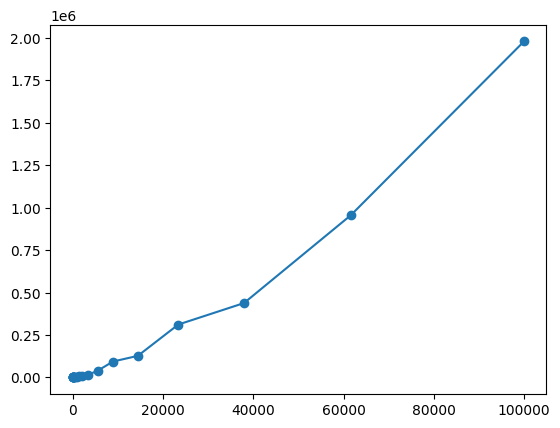

In [900]:
ts = list(np.logspace(-5, -1, num=20))
plt.plot([1/t for t in ts], [(1/eps)**(1/2.3) for eps in errs_3_L6_lT[-20:]])
plt.scatter([1/t for t in ts], [(1/eps)**(1/2.3) for eps in errs_3_L6_lT[-20:]])

#plt.xscale('log')
#plt.yscale('log')

In [896]:
list(np.logspace(-5, -1, num=20))

[1e-05,
 1.623776739188721e-05,
 2.6366508987303556e-05,
 4.281332398719396e-05,
 6.951927961775606e-05,
 0.00011288378916846884,
 0.00018329807108324357,
 0.00029763514416313193,
 0.0004832930238571752,
 0.0007847599703514606,
 0.0012742749857031334,
 0.00206913808111479,
 0.003359818286283781,
 0.005455594781168515,
 0.008858667904100823,
 0.01438449888287663,
 0.023357214690901212,
 0.03792690190732246,
 0.06158482110660261,
 0.1]

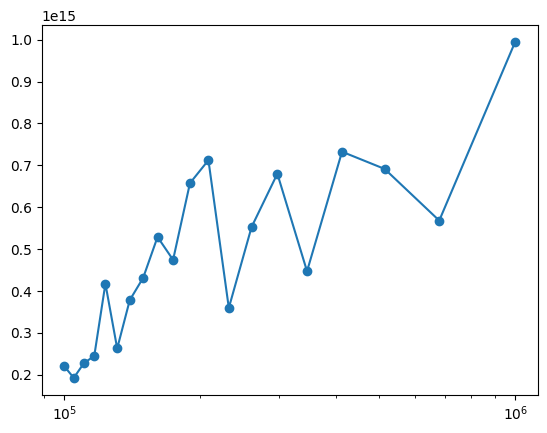

In [884]:
ts = np.linspace(1e-6, 1e-5, 20)
plt.plot([1/t for t in ts], [1/eps for eps in errs_3_L6_])
plt.scatter([1/t for t in ts], [1/eps for eps in errs_3_L6_])


plt.xscale('log')
#plt.yscale('log')


===== t = 0.5 =====
exp             params = [2.55276664 0.82387803],  reduced chi^2 = 1.442e-06
stretched_exp   params = [0.55721213 2.09685961 2.09355203],  reduced chi^2 = 1.631e-11
powerlaw_exp    params = [ 5.31577123  0.26623865 -6.27693201],  reduced chi^2 = 1.622e-11


/tmp/ipykernel_26296/2515783482.py:15: RuntimeWarning: invalid value encountered in power
  return A * np.exp(-(L/xi)**alpha)


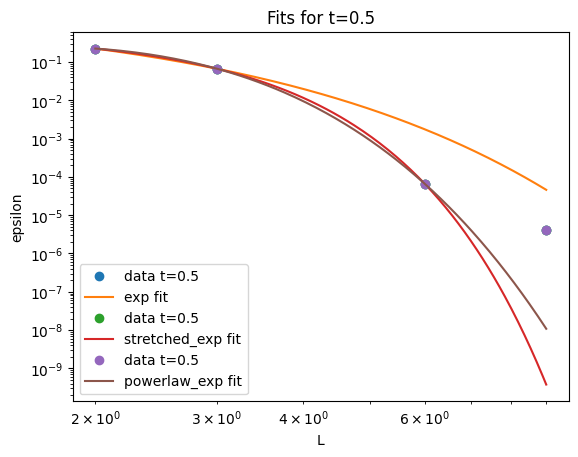


===== t = 0.75 =====
exp             params = [2.9405519  0.98505838],  reduced chi^2 = 1.055e-05
stretched_exp   params = [1.21713703 1.82915696 1.5539888 ],  reduced chi^2 = 1.744e-11
powerlaw_exp    params = [ 3.75770489  0.52602799 -2.20144462],  reduced chi^2 = 1.810e-10


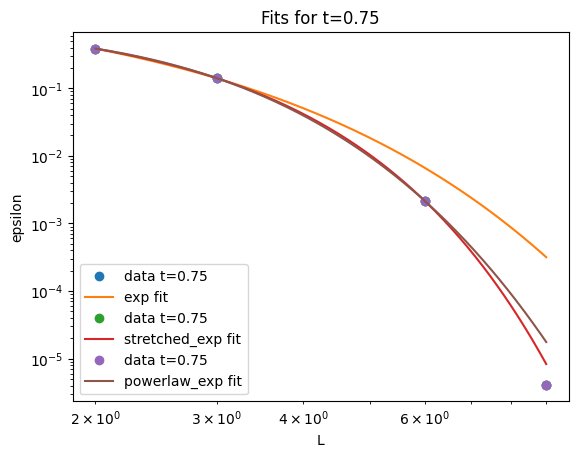


===== t = 0.9 =====
exp             params = [4.69812981 0.9129949 ],  reduced chi^2 = 5.633e-06
stretched_exp   params = [12.89614745  0.4047603   0.72807256],  reduced chi^2 = 4.236e-07
powerlaw_exp    params = [4.24947515 1.37504327 0.91674548],  reduced chi^2 = 3.371e-07


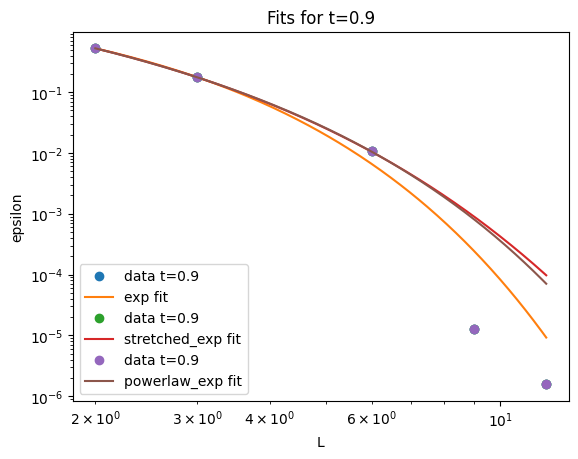


===== t = 2 =====
exp             params = [2.67404031 2.45923734],  reduced chi^2 = 2.977e-03
stretched_exp   params = [1.4340134  4.23518818 1.98875096],  reduced chi^2 = 8.924e-05
powerlaw_exp    params = [ 2.31626765  1.22720709 -1.33308643],  reduced chi^2 = 7.408e-06


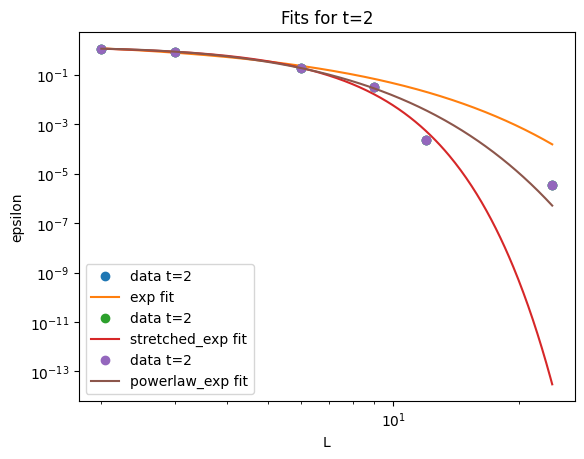


===== t = 4 =====
exp             params = [1.74903735 4.48827539],  reduced chi^2 = 8.517e-03
stretched_exp   params = [1.14240733 6.51123754 2.30556453],  reduced chi^2 = 2.218e-03
powerlaw_exp    params = [ 1.28396649  1.84260493 -1.26253031],  reduced chi^2 = 3.940e-05


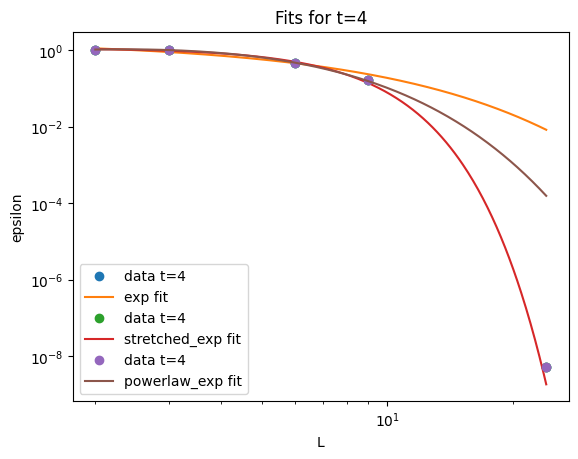

In [968]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ---------------------------
# Define candidate models
# ---------------------------

def exp_model(L, A, xi):
    # epsilon ~ A * exp(-L/xi)
    return A * np.exp(-L/xi)

def stretched_exp_model(L, A, xi, alpha):
    # epsilon ~ A * exp(-(L/xi)^alpha)
    return A * np.exp(-(L/xi)**alpha)

def powerlaw_exp_model(L, A, xi, beta):
    # epsilon ~ A * L^{-beta} * exp(-L/xi)
    return A * (L**(-beta)) * np.exp(-L/xi)

# ---------------------------
# Goodness-of-fit metric
# ---------------------------

def reduced_chisq(ydata, yfit, popt, yerr=None):
    if yerr is None:
        yerr = np.ones_like(ydata)
    residuals = (ydata - yfit)/yerr
    dof = len(ydata) - len(popt)
    return np.sum(residuals**2)/dof

# ---------------------------
# Data
# ---------------------------

datasets = {
    0.5: {
        'L': np.array([2,3,6,9]),
        'eps': np.array([0.22525067, 0.067105242322, 6.646956431246719e-05, 4.038344480995285e-06])
    },
    0.75: {
        'L': np.array([2,3,6,9]),
        'eps': np.array([0.38583497832172, 0.1407491446732, 0.0021595830193, 4.1350631961880815e-06])
    },
    0.9: {
        'L': np.array([2,3,6,9,12]),
        'eps': np.array([0.52563943965, 0.1751397248, 0.0106306265603298, 1.259484584859021e-05, 1.563920824400639e-06])
    },
    2: {
        'L': np.array([2,3,6,9,12,24]),
        'eps': np.array([1.14361008539851, 0.869520708510, 0.1891014117068, 0.03145520900, 0.00022703, 3.5588589655471698e-06])
    },
    4: {
        'L': np.array([2,3,6,9,24]),
        'eps': np.array([1.038903, 1.01199, 0.4698972629, 0.16188819053768, 5.2642863475543846e-09])
    }
}

# ---------------------------
# Fit loop
# ---------------------------

models = {
    "exp": (exp_model, [1.0, 1.0]),
    "stretched_exp": (stretched_exp_model, [1.0, 1.0, 2.0]),
    "powerlaw_exp": (powerlaw_exp_model, [1.0, 1.0, 1.0])
}

for t, data in datasets.items():
    L, eps = data['L'], data['eps']
    print(f"\n===== t = {t} =====")

    for name, (model, p0) in models.items():
        try:
            popt, pcov = curve_fit(model, L, eps, p0=p0, maxfev=10000)
            eps_fit = model(L, *popt)
            chi2 = reduced_chisq(eps, eps_fit, popt)
            print(f"{name:15s} params = {popt},  reduced chi^2 = {chi2:.3e}")

            # optional: plot fits
            Lfine = np.linspace(min(L), max(L), 200)
            plt.loglog(L, eps, 'o', label=f'data t={t}')
            plt.loglog(Lfine, model(Lfine, *popt), '-', label=f'{name} fit')
        except Exception as e:
            print(f"{name:15s} fit failed: {e}")

    plt.xlabel("L")
    plt.ylabel("epsilon")
    plt.legend()
    plt.title(f"Fits for t={t}")
    plt.show()


Total data points: 25
Fitting model: tlogt_variant
params:
  p[0] = 1.5205e-07 +/- 6.29e-09
chi2 = 9.416e+03, red_chi2 = 3.923e+02, AICc = 9.418e+03, BIC = 9.419e+03
Per-t fit t=0.5: A=0.557, xi=2.1, alpha=2.09
Per-t fit t=0.75: A=1.22, xi=1.83, alpha=1.55
Per-t fit t=0.9: A=12.9, xi=0.405, alpha=0.728
Per-t fit t=2: A=1.43, xi=4.24, alpha=1.99
Per-t fit t=4: A=1.14, xi=6.52, alpha=2.37
Estimated xi(t) ~ 1.8 * t^0.814


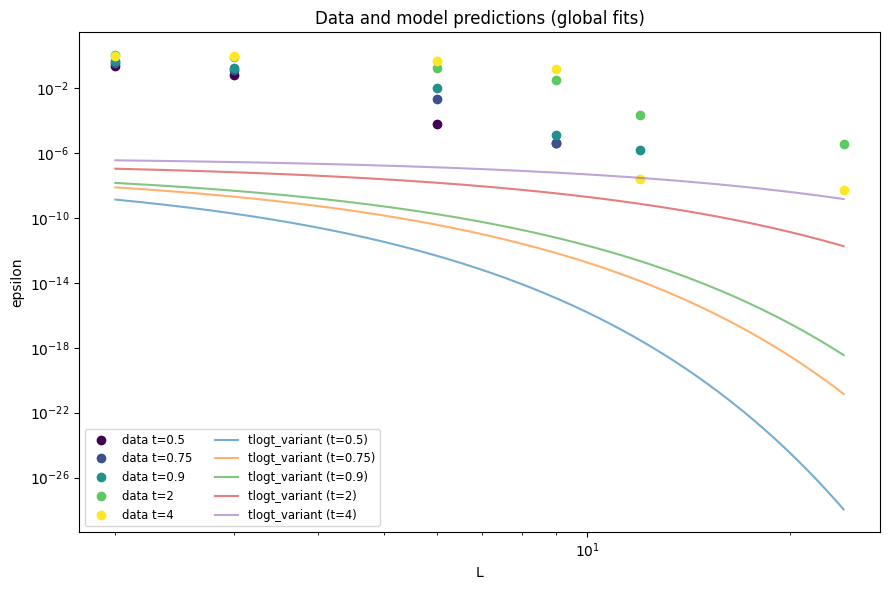

Model ranking by AICc:
  tlogt_variant         AICc=9417.992, BIC=9419.037, red_chi2=3.923e+02
Done. Tweak rel_err or model definitions to explore sensitivity.


In [973]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import warnings

# ---------------------------
# Combined, t-dependent fitting script
# ---------------------------
# This script fits the provided (L, t, eps) data to several Ansatze that
# *explicitly* include t-dependence. It performs global fits across all
# t-values and also performs per-t fits for diagnostics.
#
# Metrics reported: reduced chi^2 (using a relative error model), AICc, BIC.
#
# Usage: run this script (Python 3.8+). You can tweak rel_err, bounds, or
# add/remove models in the `models` dictionary.

# ---------------------------
# Data
# ---------------------------
datasets = {
    0.5: {
        'L': np.array([2,3,6,9]),
        'eps': np.array([0.22525067, 0.067105242322, 6.646956431246719e-05, 4.038344480995285e-06])
    },
    0.75: {
        'L': np.array([2,3,6,9]),
        'eps': np.array([0.38583497832172, 0.1407491446732, 0.0021595830193, 4.1350631961880815e-06])
    },
    0.9: {
        'L': np.array([2,3,6,9,12]),
        'eps': np.array([0.52563943965, 0.1751397248, 0.0106306265603298, 1.259484584859021e-05, 1.563920824400639e-06])
    },
    2: {
        'L': np.array([2,3,6,9,12,24]),
        'eps': np.array([1.14361008539851, 0.869520708510, 0.1891014117068, 0.03145520900, 0.00022703, 3.5588589655471698e-06])
    },
    4: {
        'L': np.array([2,3,6,9,12,24]),
        'eps': np.array([1.038903, 1.01199, 0.4698972629, 0.16188819053768, 2.5790996218366514e-08, 5.2642863475543846e-09])
    }
}

# ---------------------------
# Build combined arrays (one big dataset for global fits)
# ---------------------------
L_all = np.concatenate([datasets[t]['L'] for t in datasets])
t_all = np.concatenate([np.full_like(datasets[t]['L'], fill_value=t, dtype=float) for t in datasets])
eps_all = np.concatenate([datasets[t]['eps'] for t in datasets])

N = len(eps_all)
print(f"Total data points: {N}")

# ---------------------------
# Error model (use relative errors so chi^2 is meaningful)
# You can change rel_err depending on how noisy you believe the data to be.
# ---------------------------
rel_err = 0.05   # assume 5% relative errors by default
abs_floor = 1e-12
sigma_all = np.maximum(np.abs(eps_all) * rel_err, abs_floor)

# ---------------------------
# Helper: metrics
# ---------------------------

def compute_metrics(y, yfit, sigma, n_params):
    """Return (chi2, red_chi2, AICc, BIC) using weighted residuals.

    We use the Gaussian log-likelihood where -2 ln L ~= chi2 + const, and for
    model comparison we use AICc and BIC in the simplified form:
      AICc = 2k + chi2 + 2k(k+1)/(N-k-1)  (if N-k-1>0)
      BIC  = k*ln(N) + chi2
    These drop additive constants that are the same across models.
    """
    residuals = (y - yfit) / sigma
    chi2 = float(np.sum(residuals**2))
    dof = max(1, len(y) - n_params)
    red_chi2 = chi2 / dof
    k = n_params
    if len(y) - k - 1 > 0:
        AICc = 2*k + chi2 + 2*k*(k+1)/(len(y)-k-1)
    else:
        AICc = 2*k + chi2
    BIC = k * np.log(len(y)) + chi2
    return chi2, red_chi2, AICc, BIC

# ---------------------------
# Define t-dependent models
# All model functions take X=(L, t) as first argument, then parameters.
# ---------------------------

def model_exp_tpref(X, A, xi0, q, p):
    # eps = A * t^p * exp(- L / (xi0 * t^q) )
    L, t = X
    xi = xi0 * (t**q)
    return A * (t**p) * np.exp(-L / xi)

def model_stretched_t(X, A, xi0, q, alpha, p):
    # eps = A * t^p * exp( - (L / (xi0 * t^q))^alpha )
    L, t = X
    xi = xi0 * (t**q)
    return A * (t**p) * np.exp(- (L / xi)**alpha)

def model_powerlawexp_t(X, A, xi0, q, beta, p):
    # eps = A * t^p * L^{-beta} * exp(- L / (xi0 * t^q) )
    L, t = X
    xi = xi0 * (t**q)
    return A * (t**p) * (L**(-beta)) * np.exp(-L / xi)

# Special forms you suggested explicitly:
# L = t log(t/eps)  --> eps = t * exp(-L/t)
# L = t log(1/eps)  --> eps = exp(-L/t)
# We'll include fitted prefactors A for flexibility.

def model_tlogt_variant(X, A):
    L, t = X
    return A * t * np.exp(-L / t)

def model_tlog1_variant(X, A):
    L, t = X
    return A * np.exp(-L / t)

# ---------------------------
# Pack models for automated fitting
# Each entry: name: (func, p0, bounds, n_params)
# ---------------------------
models = {
    #'exp_tpref': (model_exp_tpref, [1.0, 1.0, 1.0, 0.0], ([1e-12, 1e-12, -3.0, -5.0], [1e3, 1e3, 3.0, 5.0])),
    #'stretched_t': (model_stretched_t, [1.0, 1.0, 1.0, 1.0, 0.0], ([1e-12,1e-12,-3.0,0.1,-5.0], [1e3,1e3,5.0,5.0,5.0])),
    #'powerlawexp_t': (model_powerlawexp_t, [1.0, 1.0, 1.0, 1.0, 0.0], ([1e-12,1e-12,-3.0, -5.0, -5.0], [1e3,1e3,5.0,5.0,5.0])),
    'tlogt_variant': (model_tlogt_variant, [1.0], ([1e-12], [1e6])),
    #'tlog1_variant': (model_tlog1_variant, [1.0], ([1e-12], [1e6]))
}

# ---------------------------
# Fitting helper
# ---------------------------

def fit_model(name, func, p0, bounds):
    print('Fitting model:', name)
    try:
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            popt, pcov = curve_fit(func, (L_all, t_all), eps_all, p0=p0, sigma=sigma_all,
                                   absolute_sigma=True, bounds=bounds, maxfev=20000)
        yfit = func((L_all, t_all), *popt)
        chi2, red_chi2, AICc, BIC = compute_metrics(eps_all, yfit, sigma_all, len(popt))
        perr = np.sqrt(np.diag(pcov)) if pcov is not None else np.full(len(popt), np.nan)

        print('params:')
        for i, val in enumerate(popt):
            print(f'  p[{i}] = {val:.6g} +/- {perr[i]:.3g}')
        print(f'chi2 = {chi2:.3e}, red_chi2 = {red_chi2:.3e}, AICc = {AICc:.3e}, BIC = {BIC:.3e}')

        return dict(name=name, popt=popt, perr=perr, pcov=pcov, chi2=chi2, red_chi2=red_chi2, AICc=AICc, BIC=BIC, yfit=yfit)

    except Exception as e:
        print('FIT FAILED for', name, ':', str(e))
        return None

# ---------------------------
# Run global fits
# ---------------------------
results = {}
for name, (func, p0, bounds) in models.items():
    res = fit_model(name, func, p0, bounds)
    results[name] = res

# ---------------------------
# Diagnostic: per-t fits to stretched exponential to extract xi(t)
# eps(L; t) = A_t * exp(-(L/xi_t)^alpha_t)
# Fit each t separately (this is useful to see how xi scales with t)
# ---------------------------

def stretched_local(L, A, xi, alpha):
    return A * np.exp(-(L/xi)**alpha)

xi_list = []
t_list = []
alpha_list = []
for t in sorted(datasets.keys()):
    L = datasets[t]['L']
    eps = datasets[t]['eps']
    try:
        p0 = [1.0, 1.0, 1.0]
        bounds = ([1e-12, 1e-6, 0.05], [1e3, 1e3, 5.0])
        popt, pcov = curve_fit(stretched_local, L, eps, p0=p0, bounds=bounds, maxfev=10000)
        A_t, xi_t, alpha_t = popt
        xi_list.append(xi_t)
        t_list.append(t)
        alpha_list.append(alpha_t)
        print(f'Per-t fit t={t}: A={A_t:.3g}, xi={xi_t:.3g}, alpha={alpha_t:.3g}')
    except Exception as e:
        print('Per-t fit failed for t=', t, ' :', e)

# Fit xi(t) ~ c * t^q via linear fit in log space if we have at least 2 points
if len(t_list) >= 2:
    logt = np.log(t_list)
    logxi = np.log(xi_list)
    coeffs = np.polyfit(logt, logxi, 1)
    q_est, logc_est = coeffs[0], coeffs[1]
    c_est = np.exp(logc_est)
    print(f'Estimated xi(t) ~ {c_est:.3g} * t^{q_est:.3g}')

# ---------------------------
# Plotting: data by t and best-fit model curves
# ---------------------------

colors = plt.cm.viridis(np.linspace(0,1,len(datasets)))
plt.figure(figsize=(9,6))
for (i,t), color in zip(enumerate(sorted(datasets.keys())), colors):
    L = datasets[t]['L']
    eps = datasets[t]['eps']
    plt.loglog(L, eps, 'o', label=f'data t={t}', color=color)

# overlay each model's prediction as lines (use different linestyles)
Lfine = np.logspace(np.log10(min(L_all)), np.log10(max(L_all)), 400)
for j,(name,res) in enumerate(results.items()):
    if res is None:
        continue
    func = models[name][0]
    popt = res['popt']
    # plot predictions for each t as faint lines
    for t, color in zip(sorted(datasets.keys()), colors):
        ypred = func((Lfine, np.full_like(Lfine, t)), *popt)
        plt.loglog(Lfine, ypred, '-', alpha=0.6, label=f'{name} (t={t})' if j==0 else None)

plt.xlabel('L')
plt.ylabel('epsilon')
plt.title('Data and model predictions (global fits)')
plt.legend(fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

# ---------------------------
# Summary table (print a short ranking by AICc)
# ---------------------------
valid_results = [r for r in results.values() if r is not None]
if valid_results:
    ranked = sorted(valid_results, key=lambda r: r['AICc'])
    print('Model ranking by AICc:')
    for r in ranked:
        print(f"  {r['name']:20s}  AICc={r['AICc']:.3f}, BIC={r['BIC']:.3f}, red_chi2={r['red_chi2']:.3e}")

print('Done. Tweak rel_err or model definitions to explore sensitivity.')
